# STA 208: Homework 5

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

When writing pseudocode, you should use enumerated lists, such as 

__Algorithm: Ordinary Least Squares Fit__
(Input: X, y; 
Output: $\beta$)
1. Initialize the $p \times p$ Gram matrix, $G \gets 0$, and the vector $b \gets 0$.
2. For each sample, $x_i$:
 1. $G \gets G + x_i x_i^\top$.
 2. $b \gets b + y_i x_i$
3. Solve the linear system $G \beta = b$ and return $\beta$


__Exercise 1__ Recall the adaboost algorithm for $y_i \in \{-1,1\}$...

1. Initialize the observed weights $w^{(1)}_i \gets 1/n$, $t \gets 1$.
1. For $t = 1,\ldots,T$
 1. Get a classifier $f_t(x) \in \{-1,1\}$
 1. Get the weighted error: $\epsilon_t = \sum_{i=1}^n w_i^{(t)} 1\{ f_t(x_i) \ne y_i \}$
 1. Let $\alpha_t \gets \log (\epsilon_t / (1 - \epsilon_t))$
 1. $w^{(t+1)}_i \gets w^{(t)}_i \exp ( -y_i f_t(x_i) \alpha_t )$ for all i.
 1. Let $Z_t \gets \sum_{i=1}^n w^{(t)}_i$, and $w^{(t+1)}_i \gets w_i^{(t+1)} / Z_t$ for all i.
1. Output the classifier: $$\hat y(x) = {\rm sign}\left( \sum_{t=1}^T \alpha_t f_t(x) \right)$$

We will demonstrate that the training error is bounded if each of these classifiers is a weak learner.  To this end, let $\epsilon_t = \frac 12 - \gamma_t$.  
If we can show that the training error is bounded by
$$ \prod_{t=1}^T \sqrt{2 \epsilon_t (1- \epsilon_t)} $$ then
we will see that the training error is bounded by
$$ \exp\left( - 2 \sum_{t=1}^T \gamma_t^2 \right) $$
because $\sqrt{2 \epsilon_t(1 - \epsilon_t)} \le \exp(2 \gamma_t^2)$.

__Exercise 1.1__ Demonstrate that 
$$ w^{(T+1)}_i = \frac 1n \frac{\exp(- y_i f(x_i))}{\prod_{t=1}^T Z_t}$$
where $f(x) = \sum_{t=1}^T \alpha_t f_t(x)$.

__Exercise 1.1__

Since $w_i^{T+1}=\frac{w_i^T exp(-y_i f_T(x_i) \alpha_T)}{Z_T}$, we can have the following:
$$w_i^{T+1}=\frac{w_i^T exp(-y_i f_T(x_i) \alpha_T)}{Z_T}=\frac{w_i^{T-1}exp(-y_i f_{T-1}(x_i)\alpha_{T-1})exp(-y_i f_T(x_i)\alpha_T)}{Z_T Z_{T-1}}$$
When we apply the above relation recursively from T to 1, we can finally reach the following:
$$ w_i^{T+1}=\frac{w_1 exp(-y_i \sum_{t=1}^T [f_t(x)\alpha_t])}{\prod_{t=1}^T Z_t}$$
From the definition we know $w_1=\frac{1}{n}$ and given $f(x) = \sum_{t=1}^T \alpha_t f_t(x)$, we can have$$ w^{(T+1)}_i = \frac 1n \frac{\exp(- y_i f(x_i))}{\prod_{t=1}^T Z_t}$$
Therefore, the desired result is obtained.

__Exercise 1.2__ Using this, show that the training error, $\frac 1n \sum_{i=1}^n 1\{ y_i \ne \hat y(x_i)\}$ is bounded by $\prod_{t=1}^T Z_t$.  Hint: use the fact that $1\{ z < 0\} \le \exp(-z)$.

__Exercise 1.2__

Based on the formulation of the above algorithm of adaboost algorithm, we can get the following: 
if $ y_i\neq\hat{y}(x_i), y_i f_t(x_i)<0$ and if $ y_i=\hat{y}(x_i), y_i f_t(x_i)\geq0$

Hence,$1(y_i\neq\hat{y}(x_i)\leq exp(-y_i f_t(x_i))$. Accordlingly, we can have $\frac 1n \sum_{i=1}^n 1\{ y_i \ne \hat y(x_i)\} \leq \frac 1 n \sum_{i=1}^n exp(-y_i f_t(x_i))$

From the results in Exercise 1.1, we have $ w^{(T+1)}_i = \frac 1n \frac{\exp(- y_i f(x_i))}{\prod_{t=1}^T Z_t}$, so $\exp(- y_i f(x_i))=n w^{(T+1)}_i \prod_{t=1}^T Z_t$. As a result, we can get the following:$$\frac 1n \sum_{i=1}^n 1\{ y_i \ne \hat y(x_i)\} \leq \frac 1 n \sum_{i=1}^n exp(-y_i f_t(x_i))=\frac 1 n \sum_{i=1}^n n w^{(T+1)}_i \prod_{t=1}^T Z_t=\sum_{i=1}^n w^{(T+1)}_i \prod_{t=1}^T Z_t=1 \times \prod_{t=1}^T Z_t=\prod_{t=1}^T Z_t$$
Therefore,the training error, $\frac 1n \sum_{i=1}^n 1\{ y_i \ne \hat y(x_i)\}$ is bounded by $\prod_{t=1}^T Z_t$.

__Exercise 1.3__ Show that 
$$ Z_t = \sqrt{2 \epsilon_t (1 - \epsilon_t)}.$$

__Exercise 1.3__

$$Z_t=\sum w_i^t exp(-y_i f_t(x_i)\alpha_t)=\sum_{y_i=f_t(x_i)} w_i^t exp(-y_i f_t(x_i)\alpha_t) +\sum_{y_i\neq f_t(x_i)} w_i^t exp(-y_i f_t(x_i)\alpha_t)=\sum_{y_i=f_t(x_i)} w_i^t exp(-\alpha_t) +\sum_{y_i\neq f_t(x_i)}w_i^t exp(\alpha_t) $$
We also have $\alpha_t=\frac 1 2 log \frac {1-\epsilon_t}{\epsilon_t}$,so $exp(-\alpha_t)=\sqrt{\frac {1-\epsilon_t}{\epsilon_t}},exp(\alpha_t)=\sqrt{\frac {\epsilon_t}{1-\epsilon_t}}$. It can also be obtained that $\sum_{y_i=f_t(x_i)} w_i^t=1-\epsilon_t,\sum_{y_i\neq f_t(x_i)} w_i^t=\epsilon_t$, we have:
$$Z_t=\sum_{y_i=f_t(x_i)} w_i^t exp(-\alpha_t) +\sum_{y_i\neq f_t(x_i)}w_i^t exp(\alpha_t)=(1-\epsilon_t)\sqrt{\frac {\epsilon_t}{1-\epsilon_t}}+\epsilon_t \sqrt{\frac {1-\epsilon_t}{\epsilon_t}}=\sqrt{\epsilon_t (1 - \epsilon_t)}+\sqrt{\epsilon_t (1 - \epsilon_t)}=2\sqrt{\epsilon_t (1 - \epsilon_t)}$$
So the proof is complete.

## Bank Dataset
The following dataset can be found at <a href="https://archive.ics.uci.edu/ml/datasets/Bank+Marketing">UCI ML repo</a>.

In [373]:
import pandas as pd
import numpy as np

In [374]:
bank = pd.read_csv('bank/bank-full.csv',sep=";")

In [148]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [375]:
X = bank.iloc[:,:-1]
y = bank['y']
y = (y == 'yes')*1
X = np.array(X)

In [376]:
from sklearn.preprocessing import OneHotEncoder 

__Exercise 2.1__ (30 pts) Predict y from X using kernel SVMs, random forests, and adaboost (see the sklearn.ensembles package).  Tune the random forest using the out-of-bag error.  Tune everything else using cross-validation, and assess the models using a separate test set with ROC, PR, confusion matrices.  Write a paragraph about the relative performances of the algorithms and any observations that you've made.

In [377]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn import model_selection
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve,auc,roc_auc_score,accuracy_score
from sklearn.preprocessing import scale,MinMaxScaler

In [378]:
###### convert the categorical data to factors and scale the other variables.
for i in range(X.shape[1]):
    if len(np.unique(X[:,i]))>10:
        if (isinstance(X[2,i], basestring))==True:
            bank.iloc[:,i]=bank.iloc[:,i].factorize()[0]
        else:
            bank.iloc[:,i]= scale(bank.iloc[:,i])
    elif (isinstance(X[2,i], basestring))==True:
        bank.iloc[:,i]=bank.iloc[:,i].factorize()[0]

In [379]:
bank.y=bank.y.factorize()[0]
X = bank.iloc[:,:-1]
X = np.array(X)

In [380]:
# training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=23)

In [216]:
### random forest
seed=23
max_features2=X.shape[1]
max_features1=1
error1=[]
clf1=RandomForestClassifier(oob_score=True,n_jobs=3,max_features=None,random_state=seed)
for i in range(max_features1,max_features2+1):
    clf1.set_params(max_features=i)
    clf1.fit(X_train,y_train)
    
    oob_err=1-clf1.oob_score_
    error1.append((oob_err))

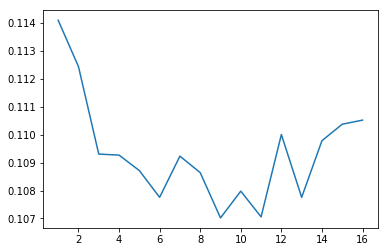

In [217]:
xs=range(max_features1,max_features2+1)
plt.plot(xs,error1)
plt.show()

In [214]:
best_rf=np.argmin(error1)+1
best_rf
clf1.set_params(max_features=best_rf)
clf1.fit(X_train,y_train)

9

In [237]:
prob1 =clf1.predict_proba(X_test) # save the probability for SVM
y_pred1=prob1[:,1]
preci1,rec1,thre1=precision_recall_curve(y_test,y_pred1) # PR curve information
fpr1,tpr1,threshold1=roc_curve(y_test,y_pred1)# ROC curve information

In [219]:
### linear SVM

C_range=np.logspace(-1,1,3)
#gamma_range=np.logspace(-3,3,7)
svrl=SVC(kernel='linear')
cv=KFold(n_splits=5,random_state=seed)
param_grid=dict(C=C_range)
clf2=GridSearchCV(svrl,param_grid,cv=cv)
clf2.fit(X_train,y_train)

C=clf2.best_params_['C']

clf2= SVC(kernel = 'linear', C = C, probability = True)
clf2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [235]:
prob2 =clf2.predict_proba(X_test) # save the probability for SVM
y_pred2=prob2[:,1]
preci2,rec2,thre2=precision_recall_curve(y_test,y_pred2) # PR curve information
fpr2,tpr2,threshold2=roc_curve(y_test,y_pred2)# ROC curve information

In [260]:
### rbf SVM
C_range=np.logspace(-1,1,3)
gamma_range=np.logspace(-1,1,3)
param_grid=dict(gamma=gamma_range,C=C_range)

svrrr=SVC(kernel='rbf')
cv=KFold(n_splits=5,random_state=seed)
param_grid=dict(C=C_range,gamma=gamma_range)
clf2rr=GridSearchCV(svrrr,param_grid,cv=cv)
clf2rr.fit(X_train,y_train)

Crr=clf2rr.best_params_['C']
gammarr=clf2rr.best_params_['gamma']

clf2rr= SVC(kernel = 'rbf', C = Crr,gamma=gammarr,probability = True)
clf2rr.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.10000000000000001,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [233]:
### AdaBoost
learning_rate=np.linspace(0.0001,2,21)
clf3=AdaBoostClassifier(learning_rate=1.0,random_state=seed)
error3=[]
cv=KFold(n_splits=5,random_state=seed)
param_grid=dict(learning_rate=learning_rate)
clf3=GridSearchCV(clf3,param_grid,cv=cv)
clf3.fit(X_train,y_train)

learning_rate=clf3.best_params_['learning_rate']

clf3=AdaBoostClassifier(learning_rate=learning_rate,random_state=seed)


In [265]:
### PR and ROC Curve
prob1 =clf1.predict_proba(X_test) # save the probability for Random Forest
y_pred1=prob1[:,1]
preci1,rec1,thre1=precision_recall_curve(y_test,y_pred1) # PR curve information
fpr1,tpr1,threshold1=roc_curve(y_test,y_pred1)# ROC curve information

prob2 =clf2.predict_proba(X_test) # save the probability for linear SVM
y_pred2=prob2[:,1]
preci2,rec2,thre2=precision_recall_curve(y_test,y_pred2) # PR curve information
fpr2,tpr2,threshold2=roc_curve(y_test,y_pred2)# ROC curve information

prob2rr=clf2.predict_proba(X_test) # save the probability for rbf SVM
y_pred2rr=prob2rr[:,1]
preci2rr,rec2rr,thre2rr=precision_recall_curve(y_test,y_pred2rr) # PR curve information
fpr2rr,tpr2rr,threshold2rr=roc_curve(y_test,y_pred2rr)# ROC curve information

prob3 =clf3.predict_proba(X_test) # save the probability for AdaBoost
y_pred3=prob3[:,1]
preci3,rec3,thre3=precision_recall_curve(y_test,y_pred3) # PR curve information
fpr3,tpr3,threshold3=roc_curve(y_test,y_pred3)# ROC curve information

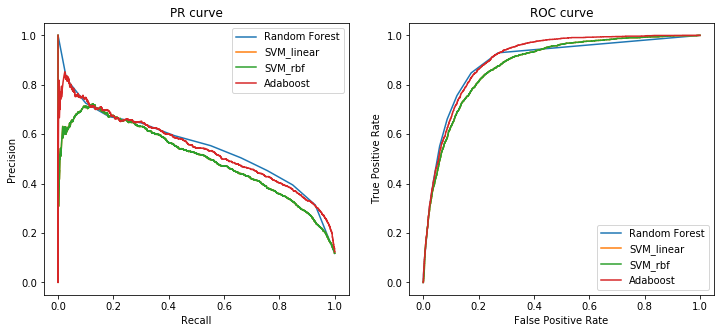

In [267]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# left plot
ax1.plot(rec1,preci1,label='Random Forest')
ax1.plot(rec2,preci2,label='SVM_linear')
ax1.plot(rec2rr,preci2rr,label='SVM_rbf')
ax1.plot(rec3,preci3,label='Adaboost')

ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR curve')

ax1.legend(loc=0)

# Right plot
ax2.plot(fpr1,tpr1,label='Random Forest')
ax2.plot(fpr2,tpr2,label='SVM_linear')
ax2.plot(fpr2rr,tpr2rr,label='SVM_rbf')
ax2.plot(fpr3,tpr3,label='Adaboost')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC curve')
ax2.legend(loc=0)

fig

In [268]:
## Confusion Matrix

cm1 = confusion_matrix(y_test, clf1.predict(X_test))
print 'confusion matrix by Random Forest:'
print cm1

cm2 = confusion_matrix(y_test, clf2.predict(X_test))
print 'confusion matrix by SVM_linear:'
print cm2

cm2rr = confusion_matrix(y_test, clf2rr.predict(X_test))
print 'confusion matrix by SVM_rbf:'
print cm2rr

cm3 = confusion_matrix(y_test, clf3.predict(X_test))
print 'confusion matrix by Adaboost:'
print cm3


confusion matrix by Random Forest:
[[15351   610]
 [ 1231   893]]
confusion matrix by SVM_linear:
[[15791   170]
 [ 1751   373]]
confusion matrix by SVM_rbf:
[[15620   341]
 [ 1445   679]]
confusion matrix by Adaboost:
[[15473   488]
 [ 1342   782]]


In [272]:
### area under curve
print "auc of Random Forest:",auc(fpr1,tpr1)
print "auc of linear SVM:",auc(fpr2,tpr2)
print "auc of rbf SVM:",auc(fpr2rr,tpr2rr)
print "auc of Adaboost:",auc(fpr3,tpr3)

auc of Random Forest: 0.892780525176
auc of linear SVM: 0.881490617844
auc of rbf SVM: 0.881490617844
auc of Adaboost: 0.905053555093


In general, all the models used here provide fairly statisfactory results. More specifically,the results by kernal SVM, Adaboost and Random Forest indicate that Adaboost provides the best prediction results and random forest outperforms SVMs. However, it should be noted that to tune the parameters of the corresponding models, only a small range of the parameters is considered to implement the tuning process. It is observed that random forest is very efficient in cross-validation to choose the parameters and SVM costs a significant amout of time to tune the parameters. Hence, to reduce the time, only a small range is used, which may also effect the comparison between the three models.

__Exercise 2.2__ (Bonus: 20 pts) Using theano, code online stochastic gradient method for logistic regression with a single hidden layer with three units that uses the sigmoid activation function.  Compare the test error to the previous methods.

You can use the code here: http://deeplearning.net/tutorial/mlp.html

You may want to use the onehotencoder to encode the categorical variables in X.

In [372]:
import theano
import theano.tensor as T

In [278]:
import os
import sys
import timeit
from logistic_sgd import LogisticRegression, load_data

In [305]:
# start-snippet-1
class HiddenLayer(object):
    def __init__(self, rng, input, n_in, n_out, W=None, b=None,
                 activation=T.sigmoid):
        """
        Typical hidden layer of a MLP: units are fully-connected and have
        sigmoidal activation function. Weight matrix W is of shape (n_in,n_out)
        and the bias vector b is of shape (n_out,).

        NOTE : The nonlinearity used here is tanh

        Hidden unit activation is given by: tanh(dot(input,W) + b)

        :type rng: numpy.random.RandomState
        :param rng: a random number generator used to initialize weights

        :type input: theano.tensor.dmatrix
        :param input: a symbolic tensor of shape (n_examples, n_in)

        :type n_in: int
        :param n_in: dimensionality of input

        :type n_out: int
        :param n_out: number of hidden units

        :type activation: theano.Op or function
        :param activation: Non linearity to be applied in the hidden
                           layer
        """
        self.input = input
        # end-snippet-1

        # `W` is initialized with `W_values` which is uniformely sampled
        # from sqrt(-6./(n_in+n_hidden)) and sqrt(6./(n_in+n_hidden))
        # for tanh activation function
        # the output of uniform if converted using asarray to dtype
        # theano.config.floatX so that the code is runable on GPU
        # Note : optimal initialization of weights is dependent on the
        #        activation function used (among other things).
        #        For example, results presented in [Xavier10] suggest that you
        #        should use 4 times larger initial weights for sigmoid
        #        compared to tanh
        #        We have no info for other function, so we use the same as
        #        tanh.
        if W is None:
            W_values = np.asarray(
                rng.uniform(
                    low=-np.sqrt(6. / (n_in + n_out)),
                    high=np.sqrt(6. / (n_in + n_out)),
                    size=(n_in, n_out)
                ),
                dtype=theano.config.floatX
            )
            if activation == theano.tensor.nnet.sigmoid:
                W_values *= 4

            W = theano.shared(value=W_values, name='W', borrow=True)

        if b is None:
            b_values = np.zeros((n_out,), dtype=theano.config.floatX)
            b = theano.shared(value=b_values, name='b', borrow=True)

        self.W = W
        self.b = b

        lin_output = T.dot(input, self.W) + self.b
        self.output = (
            lin_output if activation is None
            else activation(lin_output)
        )
        # parameters of the model
        self.params = [self.W, self.b]


# start-snippet-2
class MLP(object):
    """Multi-Layer Perceptron Class

    A multilayer perceptron is a feedforward artificial neural network model
    that has one layer or more of hidden units and nonlinear activations.
    Intermediate layers usually have as activation function tanh or the
    sigmoid function (defined here by a ``HiddenLayer`` class)  while the
    top layer is a softmax layer (defined here by a ``LogisticRegression``
    class).
    """

    def __init__(self, rng, input, n_in, n_hidden, n_out):
        """Initialize the parameters for the multilayer perceptron

        :type rng: numpy.random.RandomState
        :param rng: a random number generator used to initialize weights

        :type input: theano.tensor.TensorType
        :param input: symbolic variable that describes the input of the
        architecture (one minibatch)

        :type n_in: int
        :param n_in: number of input units, the dimension of the space in
        which the datapoints lie

        :type n_hidden: int
        :param n_hidden: number of hidden units

        :type n_out: int
        :param n_out: number of output units, the dimension of the space in
        which the labels lie

        """

        # Since we are dealing with a one hidden layer MLP, this will translate
        # into a HiddenLayer with a tanh activation function connected to the
        # LogisticRegression layer; the activation function can be replaced by
        # sigmoid or any other nonlinear function
        self.hiddenLayer = HiddenLayer(
            rng=rng,
            input=input,
            n_in=n_in,
            n_out=n_hidden,
            activation=T.sigmoid
        )

        # The logistic regression layer gets as input the hidden units
        # of the hidden layer
        self.logRegressionLayer = LogisticRegression(
            input=self.hiddenLayer.output,
            n_in=n_hidden,
            n_out=n_out
        )
        # end-snippet-2 start-snippet-3
        # L1 norm ; one regularization option is to enforce L1 norm to
        # be small
        self.L1 = (
            abs(self.hiddenLayer.W).sum()
            + abs(self.logRegressionLayer.W).sum()
        )

        # square of L2 norm ; one regularization option is to enforce
        # square of L2 norm to be small
        self.L2_sqr = (
            (self.hiddenLayer.W ** 2).sum()
            + (self.logRegressionLayer.W ** 2).sum()
        )

        # negative log likelihood of the MLP is given by the negative
        # log likelihood of the output of the model, computed in the
        # logistic regression layer
        self.negative_log_likelihood = (
            self.logRegressionLayer.negative_log_likelihood
        )
        # same holds for the function computing the number of errors
        self.errors = self.logRegressionLayer.errors

        # the parameters of the model are the parameters of the two layer it is
        # made out of
        self.params = self.hiddenLayer.params + self.logRegressionLayer.params
        # end-snippet-3

        # keep track of model input
        self.input = input

In [308]:
def test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=1000, batch_size=20, n_hidden=500):
    """
    Demonstrate stochastic gradient descent optimization for a multilayer
    perceptron

    This is demonstrated on MNIST.

    :type learning_rate: float
    :param learning_rate: learning rate used (factor for the stochastic
    gradient

    :type L1_reg: float
    :param L1_reg: L1-norm's weight when added to the cost (see
    regularization)

    :type L2_reg: float
    :param L2_reg: L2-norm's weight when added to the cost (see
    regularization)

    :type n_epochs: int
    :param n_epochs: maximal number of epochs to run the optimizer

    :type dataset: string
    :param dataset: the path of the MNIST dataset file from
                 http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz


   """
    bank = pd.read_csv('bank/bank-full.csv',sep=";")
    X = bank.iloc[:,:-1]
    y = bank['y']
    y = (y == 'yes')*1
    X = np.array(X)

    ###### convert the categorical data to factors and scale the other variables.
    for i in range(X.shape[1]):
        if len(np.unique(X[:,i]))>10:
            if (isinstance(X[2,i], basestring))==True:
                bank.iloc[:,i]=bank.iloc[:,i].factorize()[0]
            else:
                bank.iloc[:,i]= scale(bank.iloc[:,i])
        elif (isinstance(X[2,i], basestring))==True:
            bank.iloc[:,i]=bank.iloc[:,i].factorize()[0]
    bank.y=bank.y.factorize()[0]
    X = bank.iloc[:,:-1]
#    X = np.array(X)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=23)
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.3, random_state=23)
       
 
    train_set_x, train_set_y = X_tr,y_tr
    valid_set_x, valid_set_y = X_val,y_val
    test_set_x, test_set_y = X_test,y_test
    
    # compute number of minibatches for training, validation and testing
    n_train_batches = train_set_x.shape[0] // batch_size
    n_valid_batches = valid_set_x.shape[0] // batch_size
    n_test_batches = test_set_x.shape[0] // batch_size

    ######################
    # BUILD ACTUAL MODEL #
    ######################
    print('... building the model')

    # allocate symbolic variables for the data
    index = T.lscalar()  # index to a [mini]batch
    x = T.matrix('x')  # the data is presented as rasterized images
    y = T.scalar('y')  # the labels are presented as 1D vector of
                        # [int] labels

    rng = np.random.RandomState(23)

    # construct the MLP class
    classifier = MLP(
        rng=rng,
        input=x,
        n_in=28 * 28,
        n_hidden=n_hidden,
        n_out=3
    )

    # start-snippet-4
    # the cost we minimize during training is the negative log likelihood of
    # the model plus the regularization terms (L1 and L2); cost is expressed
    # here symbolically
    cost = (
        classifier.negative_log_likelihood(y)
        + L1_reg * classifier.L1
        + L2_reg * classifier.L2_sqr
    )
    # end-snippet-4

    # compiling a Theano function that computes the mistakes that are made
    # by the model on a minibatch
    test_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: test_set_x[index * batch_size:(index + 1) * batch_size],
            y: test_set_y[index * batch_size:(index + 1) * batch_size]
        }
    )

    validate_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: valid_set_x[index * batch_size:(index + 1) * batch_size],
            y: valid_set_y[index * batch_size:(index + 1) * batch_size]
        }
    )

    # start-snippet-5
    # compute the gradient of cost with respect to theta (sorted in params)
    # the resulting gradients will be stored in a list gparams
    gparams = [T.grad(cost, param) for param in classifier.params]

    # specify how to update the parameters of the model as a list of
    # (variable, update expression) pairs

    # given two lists of the same length, A = [a1, a2, a3, a4] and
    # B = [b1, b2, b3, b4], zip generates a list C of same size, where each
    # element is a pair formed from the two lists :
    #    C = [(a1, b1), (a2, b2), (a3, b3), (a4, b4)]
    updates = [
        (param, param - learning_rate * gparam)
        for param, gparam in zip(classifier.params, gparams)
    ]

    # compiling a Theano function `train_model` that returns the cost, but
    # in the same time updates the parameter of the model based on the rules
    # defined in `updates`
    train_model = theano.function(
        inputs=[index],
        outputs=cost,
        updates=updates,
        givens={
            x: train_set_x[index * batch_size: (index + 1) * batch_size],
            y: train_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )
    # end-snippet-5

    ###############
    # TRAIN MODEL #
    ###############
    print('... training')

    # early-stopping parameters
    patience = 10000  # look as this many examples regardless
    patience_increase = 2  # wait this much longer when a new best is
                           # found
    improvement_threshold = 0.995  # a relative improvement of this much is
                                   # considered significant
    validation_frequency = min(n_train_batches, patience // 2)
                                  # go through this many
                                  # minibatche before checking the network
                                  # on the validation set; in this case we
                                  # check every epoch

    best_validation_loss = np.inf
    best_iter = 0
    test_score = 0.
    start_time = timeit.default_timer()

    epoch = 0
    done_looping = False

    while (epoch < n_epochs) and (not done_looping):
        epoch = epoch + 1
        for minibatch_index in range(n_train_batches):

            minibatch_avg_cost = train_model(minibatch_index)
            # iteration number
            iter = (epoch - 1) * n_train_batches + minibatch_index

            if (iter + 1) % validation_frequency == 0:
                # compute zero-one loss on validation set
                validation_losses = [validate_model(i) for i
                                     in range(n_valid_batches)]
                this_validation_loss = np.mean(validation_losses)

                print(
                    'epoch %i, minibatch %i/%i, validation error %f %%' %
                    (
                        epoch,
                        minibatch_index + 1,
                        n_train_batches,
                        this_validation_loss * 100.
                    )
                )

                # if we got the best validation score until now
                if this_validation_loss < best_validation_loss:
                    #improve patience if loss improvement is good enough
                    if (
                        this_validation_loss < best_validation_loss *
                        improvement_threshold
                    ):
                        patience = max(patience, iter * patience_increase)

                    best_validation_loss = this_validation_loss
                    best_iter = iter

                    # test it on the test set
                    test_losses = [test_model(i) for i
                                   in range(n_test_batches)]
                    test_score = np.mean(test_losses)

                    print(('     epoch %i, minibatch %i/%i, test error of '
                           'best model %f %%') %
                          (epoch, minibatch_index + 1, n_train_batches,
                           test_score * 100.))

            if patience <= iter:
                done_looping = True
                break

    end_time = timeit.default_timer()
    print(('Optimization complete. Best validation score of %f %% '
           'obtained at iteration %i, with test performance %f %%') %
          (best_validation_loss * 100., best_iter + 1, test_score * 100.))



In [348]:
learning_rate=0.01
L1_reg=0.00
L2_reg=0.0001 
n_epochs=1000 
batch_size=20 
n_hidden=500
bank = pd.read_csv('bank/bank-full.csv',sep=";")
X = bank.iloc[:,:-1]
y = bank['y']
y = (y == 'yes')*1
X = np.array(X)

    ###### convert the categorical data to factors and scale the other variables.
for i in range(X.shape[1]):
    if len(np.unique(X[:,i]))>10:
        if (isinstance(X[2,i], basestring))==True:
            bank.iloc[:,i]=bank.iloc[:,i].factorize()[0]
        else:
            bank.iloc[:,i]= scale(bank.iloc[:,i])
    elif (isinstance(X[2,i], basestring))==True:
        bank.iloc[:,i]=bank.iloc[:,i].factorize()[0]
bank.y=bank.y.factorize()[0]
X = bank.iloc[:,:-1]
X = np.array(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=23)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.3, random_state=23)

train_set_x, train_set_y = X_tr,y_tr
valid_set_x, valid_set_y = X_val,y_val
test_set_x, test_set_y = X_test,y_test
    
    # compute number of minibatches for training, validation and testing
n_train_batches = train_set_x.shape[0] // batch_size
n_valid_batches = valid_set_x.shape[0] // batch_size
n_test_batches = test_set_x.shape[0] // batch_size

    ######################
    # BUILD ACTUAL MODEL #
    ######################
print('... building the model')

    # allocate symbolic variables for the data
index = T.lscalar()  # index to a [mini]batch
x = T.matrix('x')  # the data is presented as rasterized images
y = T.ivector('y')  # the labels are presented as 1D vector of
                        # [int] labels

rng = np.random.RandomState(23)

    # construct the MLP class
classifier = MLP(
    rng=rng,
    input=x,
    n_in=28 * 28,
    n_hidden=n_hidden,
    n_out=3
)

    # start-snippet-4
    # the cost we minimize during training is the negative log likelihood of
    # the model plus the regularization terms (L1 and L2); cost is expressed
    # here symbolically
cost = (
    classifier.negative_log_likelihood(y)
    + L1_reg * classifier.L1
    + L2_reg * classifier.L2_sqr
)
    # end-snippet-4





... building the model


In [ ]:
test_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: test_set_x[index * batch_size:(index + 1) * batch_size,:],
            y: test_set_y[index * batch_size:(index + 1) * batch_size]
        }
    )

In [369]:


Xdata.shape, ydata.shape[0]

((27126, 16), 27126)

theano.tensor.sharedvar.TensorSharedVariable

In [382]:
Xdata=X_train
ydata=y_train
p = 2
H = 4
x = T.vector('x')
W1 = theano.shared(value = np.random.randn(p*H).reshape((H,p)), name= 'W1')
w2 = theano.shared(value = np.random.randn(H), name= 'w2')
u1 = T.dot(W1,x)
h = T.nnet.relu(u1)
u2 = T.dot(h,w2)
y = T.scalar('y')
prob = T.nnet.sigmoid(u2)
R = - y * T.log(prob) - (1 - y) * T.log(1 - prob)


w2g = T.grad(R,w2)
W1g = T.grad(R,W1)

learn_rate = .05

W_updates = [(W1, W1 - learn_rate * W1g),
            (w2, w2 - learn_rate * w2g)]

grad_step = theano.function([x,y],R,updates=W_updates)

Xdata.shape, ydata[0]


n = Xdata.shape[0]



/Users/tutongbi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: UserWarning: Warning, Cannot compute test value: input 0 (dot.0) of Op sigmoid(dot.0) missing default value
/Users/tutongbi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: UserWarning: Warning, Cannot compute test value: input 0 (sigmoid.0) of Op Elemwise{log,no_inplace}(sigmoid.0) missing default value
/Users/tutongbi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: UserWarning: Warning, Cannot compute test value: input 0 (Elemwise{sub,no_inplace}.0) of Op Elemwise{log,no_inplace}(Elemwise{sub,no_inplace}.0) missing default value
